In [13]:
from __future__ import annotations

import matplotlib.pyplot as plt
import pandas as pd
from HARK.utilities import plot_funcs

from estimark.agents import IndShkLifeCycleConsumerType
from estimark.parameters import init_calibration

In [14]:
csv_file_path = "../../content/tables/TRP/IndShock_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()

In [15]:
indshk_agent = IndShkLifeCycleConsumerType(**init_calibration)
indshk_agent.CRRA = float(res["CRRA"])
indshk_agent.CRRA, indshk_agent.DiscFac

(4.475555494107589, 1.0)

In [16]:
indshk_agent.solve()

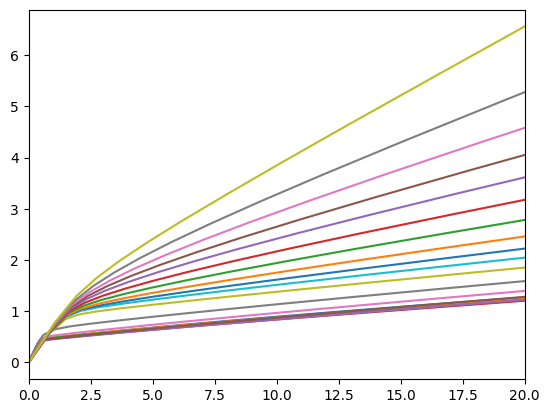

In [17]:
plot_funcs([sol.cFunc for sol in indshk_agent.solution[:-1:5]], 0, 20)
# plt.savefig("../content/figures/IndShock_cFunc.png")

In [18]:
# Set up the variables we want to keep track of.
indshk_agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "mNrm"]

indshk_agent.T_sim = indshk_agent.T_cycle + 1
# Run the simulations
indshk_agent.initialize_sim()
history = indshk_agent.simulate()

In [19]:
raw_data = {
    "Age": indshk_agent.history["t_age"].flatten() + 25,
    "pIncome": indshk_agent.history["pLvl"].flatten(),
    "nrmM": indshk_agent.history["mNrm"].flatten(),
    "nrmC": indshk_agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC * Data.pIncome
Data["M"] = Data.nrmM * Data.pIncome

# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).median().reset_index()

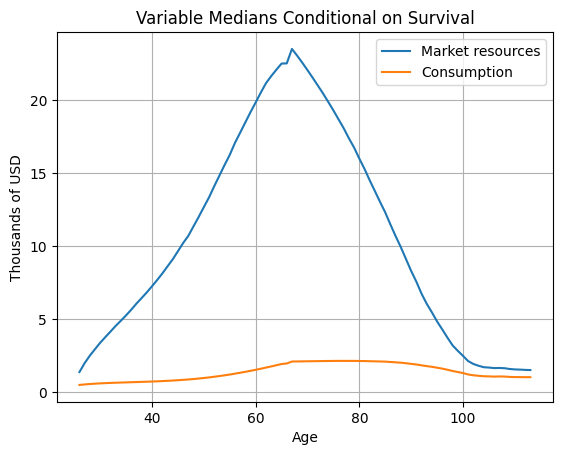

In [20]:
plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.nrmM, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.nrmC, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()

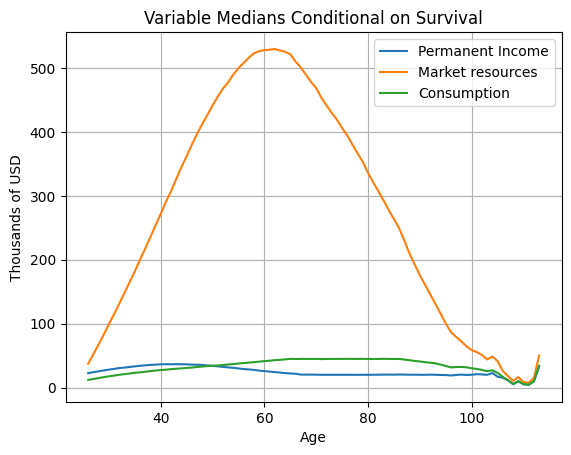

In [21]:
plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Permanent Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()